In [20]:
import numpy as np 
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set()

In [21]:
data = pd.read_csv("C:/Users/LENOVO/Downloads/Categorical.csv")
data

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,Oceania
237,Yemen,47.586762,15.909280,Asia
238,South Africa,25.083901,-29.000341,Africa
239,Zambia,27.774759,-13.458242,Africa


In [22]:
data_mapped = data.copy()
data_mapped['continent'] = data_mapped['continent'].map({'North America':0, 'Asia':1, 'Africa':2, 'Europe':3, 'South America':4,
       'Oceania':5, 'Antarctica':6, 'Seven seas (open ocean)':7})
data_mapped

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,0
1,Afghanistan,66.004734,33.835231,1
2,Angola,17.537368,-12.293361,2
3,Anguilla,-63.064989,18.223959,0
4,Albania,20.049834,41.142450,3
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,5
237,Yemen,47.586762,15.909280,1
238,South Africa,25.083901,-29.000341,2
239,Zambia,27.774759,-13.458242,2


In [30]:
x = data_mapped.iloc[:,3:4]
x

,continent
0,0
1,1
2,2
3,0
4,3
...,...
236,5
237,1
238,2
239,2


In [43]:
kmeans = KMeans(7)

In [44]:
kmeans.fit(x)
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([5, 0, 4, 5, 1, 1, 1, 0, 6, 0, 3, 2, 3, 2, 5, 3, 1, 0, 4, 1, 4, 4,
       0, 1, 0, 5, 5, 1, 5, 1, 5, 5, 6, 6, 5, 0, 0, 4, 4, 1, 6, 0, 4, 4,
       4, 4, 3, 6, 4, 4, 5, 5, 5, 5, 0, 0, 1, 1, 4, 5, 1, 5, 4, 6, 4, 4,
       1, 1, 4, 1, 3, 6, 1, 1, 3, 4, 1, 0, 1, 4, 4, 4, 4, 4, 1, 5, 5, 5,
       3, 6, 0, 2, 5, 1, 5, 1, 0, 1, 0, 0, 2, 1, 0, 0, 1, 0, 1, 5, 1, 0,
       0, 0, 0, 4, 0, 0, 3, 5, 0, 1, 0, 0, 0, 4, 4, 5, 1, 0, 4, 1, 1, 1,
       0, 5, 4, 1, 1, 4, 2, 5, 3, 1, 4, 1, 0, 1, 0, 3, 4, 4, 5, 2, 4, 0,
       4, 3, 4, 3, 4, 5, 3, 1, 1, 0, 3, 3, 0, 0, 5, 3, 6, 0, 3, 3, 1, 5,
       0, 1, 6, 0, 3, 0, 1, 1, 4, 4, 0, 4, 4, 4, 0, 2, 2, 3, 4, 5, 1, 4,
       4, 5, 1, 4, 6, 1, 1, 1, 4, 5, 2, 0, 5, 4, 4, 0, 0, 0, 0, 3, 5, 4,
       0, 0, 4, 4, 1, 6, 5, 0, 1, 5, 6, 5, 5, 0, 3, 3, 3, 0, 4, 4, 4])

In [45]:
data_with_clusters = data_mapped.copy()
data_with_clusters['clusters'] = identified_clusters
data_with_clusters

,name,Longitude,Latitude,continent,clusters
0,Aruba,-69.982677,12.520880,0,5
1,Afghanistan,66.004734,33.835231,1,0
2,Angola,17.537368,-12.293361,2,4
3,Anguilla,-63.064989,18.223959,0,5
4,Albania,20.049834,41.142450,3,1
...,...,...,...,...,...
236,Samoa,-172.164851,-13.753243,5,3
237,Yemen,47.586762,15.909280,1,0
238,South Africa,25.083901,-29.000341,2,4
239,Zambia,27.774759,-13.458242,2,4


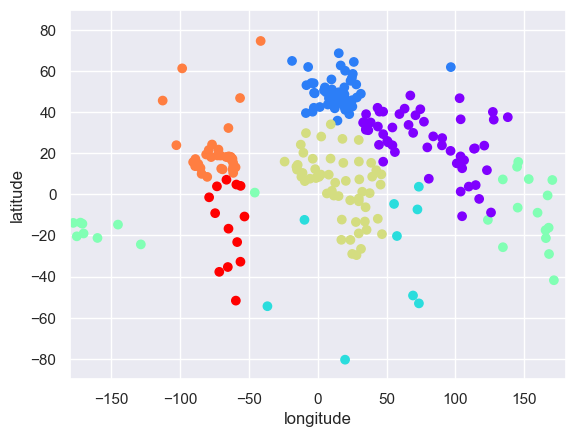

In [46]:
plt.scatter(data['Longitude'],data['Latitude'],c=data_with_clusters['clusters'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()